In [0]:
!mkdir ./Image


In [0]:
!mkdir ./Image/1

In [0]:
#import libraries
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())
import os, sys, time, datetime, random
import matplotlib.patches as patches
from PIL import Image
from torch.autograd import Variable
import warnings
warnings.simplefilter("ignore")


0it [00:00, ?it/s]

170500096it [00:06, 25164862.87it/s]                               


In [0]:
#classes array to know the label of the image
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
import torch.nn as nn

#Model Architecture
class MyNet(nn.Module):
    def __init__(self): 
        super(MyNet, self).__init__()
        #Convolutional network ( N refers to batch size, i.e, 128)
        self.cnn_model = nn.Sequential(
            #1 Layer
            nn.Conv2d(3, 64, 3, padding=(1,1)),         # (N, 3, 32, 32) -> (N,  64, 32, 32)
            #2 Layer
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),                  # (N, 64, 32, 32) -> (N,  64, 16, 16)
            nn.BatchNorm2d(64),
            #3 Layer
            nn.Conv2d(64, 128, 3, padding=(1,1)),       # (N, 64, 16, 16) -> (N, 128, 16, 16)  
            #4 Layer
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),                  # (N, 128, 16, 16) -> (N, 128, 8, 8)
            nn.BatchNorm2d(128),
            #5 Layer
            nn.Conv2d(128, 256, 3, padding=(1,1)),      # (N, 128, 8, 8) -> (N, 256, 8, 8)  
            #6 Layer
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),                  # (N, 256, 8, 8) -> (N, 256, 4, 4)
            nn.BatchNorm2d(256),
            #7 Layer
            nn.Conv2d(256, 512, 3, padding=(1,1)),      # (N, 256, 4, 4) -> (N, 512, 4, 4)  
            #8 Layer
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),                  # (N, 512, 4, 4) -> (N, 512, 2, 2)
            nn.BatchNorm2d(512),
        )
        #Fully Connected Network
        self.fc_model = nn.Sequential(
            #10 Layer
            nn.Linear(2048,128),                        # (N, 2048) -> (N, 128)
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.BatchNorm1d(128),
            #11 Layer
            nn.Linear(128,256),                         # (N, 128) -> (N, 256)
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.BatchNorm1d(256),
            #12 Layer
            nn.Linear(256,512),                         # (N, 256) -> (N, 512)
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.BatchNorm1d(512),
            #13 Layer
            nn.Linear(512,1024),                        # (N, 512)  -> (N, 1024)
            nn.ReLU(),
            nn.Dropout(0.7),
            nn.BatchNorm1d(1024),
            #14 Layer
            nn.Linear(1024, 10)                         # (N, 1024)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        
        #9 Layer (Falttening)
        x = x.view(x.size(0), -1)
        
        x = self.fc_model(x)
        return x

In [0]:
# 128 images per batch
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
#use gpu
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
#Evaluate the data
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
# call the class and setup loss and optimizer
import torch.optim as optim

net = MyNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16


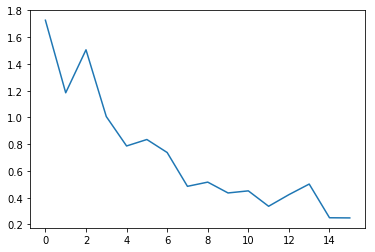

CPU times: user 5min 57s, sys: 2min 32s, total: 8min 30s
Wall time: 8min 31s


In [0]:
#Train the model
%%time
max_epochs = 16
loss_arr = []
loss_epoch_arr = []
net.train()
for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d' % (epoch, max_epochs))
    
    
plt.plot(loss_epoch_arr)
plt.show()

In [0]:
net.eval()
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 75.21, Train acc: 93.60


In [0]:
#show a particular image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [0]:
#show a example
loadSomeImage = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True)
dataiter = iter(loadSomeImage)
images, labels = dataiter.next()

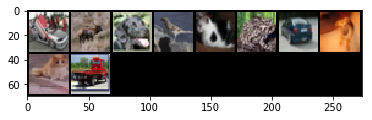

car deer dog bird cat frog car dog cat truck


In [0]:
#show the randomly loaded image
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(10)))

In [0]:
#show some filter outputs 1
# imshow(images[0])
# filter = net.cnn_model[0](images)
# # out = net.cnn_model[0](images)
# # out = net.cnn_model[1](out)
# # out.shape
# plt.figure(figsize = (6,6))
# plt.subplot(321)
# for i in range(6):
#     ax1 = plt.subplot(3, 2, i+1)
#     plt.imshow(filter[0, i, :, :].detach().numpy())
# plt.show()


In [0]:
# img_no = 2
# imshow(images[img_no])
# for i in range(3):
#     ax1 = plt.subplot(3, 2, i+1)
#     plt.imshow(images[img_no, i, :, :].detach().numpy())
# plt.show()


In [0]:
# #show some filter outputs 1
# img_no = 2
# imshow(images[img_no])
# filter_no = 5
# filter = net.cnn_model[0](images)
# for i in range(1,filter_no):
#   filter = net.cnn_model[i](filter)
  
# plt.figure(figsize = (8,8))
# plt.subplot(321)
# for i in range(9):
#     ax1 = plt.subplot(3, 3, i+1)
#     plt.imshow(filter[img_no, i, :, :].detach().numpy())
# plt.show()


In [0]:
#transfer the model to cpu
net = net.to('cpu')

In [0]:
out = net(images)
print(out.shape)

torch.Size([10, 10])


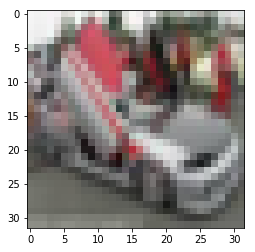

truck


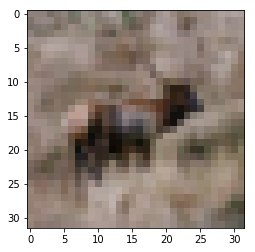

deer


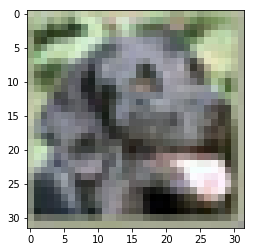

cat


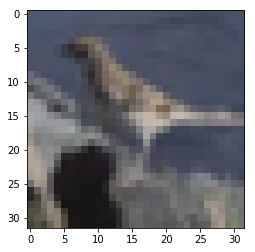

plane


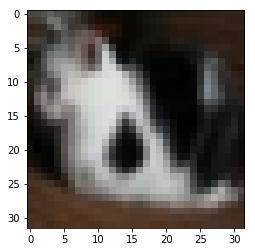

cat


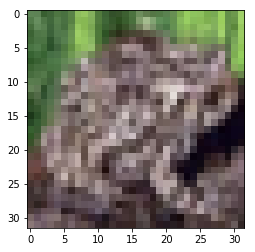

frog


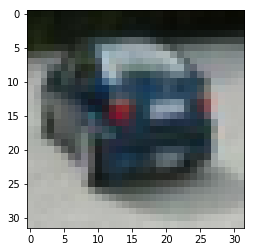

car


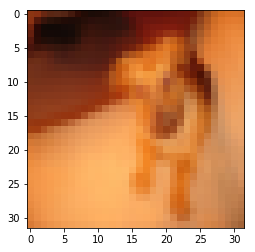

cat


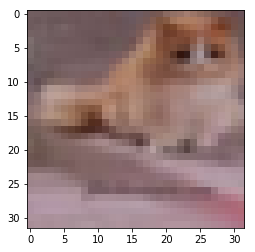

dog


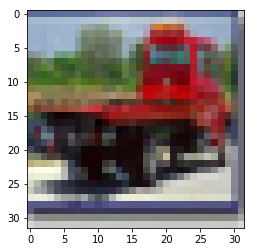

truck


In [0]:
_, predicted = torch.max(out.data, 1)
#display a particluar image and predict 
for i in range(10):
  image = i #set images value form 0 to 9 and see the output
  imshow(images[i])
  
  print(classes[predicted.numpy()[image]])

In [0]:
def load_images(root="./Image"):

    transform = transforms.Compose([
                    transforms.Resize(32),
                    transforms.CenterCrop(32),
                    transforms.ToTensor()
    ])

    test_set = torchvision.datasets.ImageFolder(root=root, transform=transform)
    test_loader = torch.utils.data.DataLoader(test_set, batch_size=2, shuffle=False)

    return test_loader 

In [0]:
rand_img = images
import urllib.request
def output_PIL(image):
  data = np.asarray(image)
#   print(data.shape)
  plt.imshow(data)
  plt.axis('off')
  plt.show()

def user_input(url):
  for i in range(2):
    url = url
    urllib.request.urlretrieve(url, './Image/1/'+str(i)+'.jpg')
  imagess = load_images()
  dataiter = iter(imagess)
  images, labels = dataiter.next()
#   imshow(torchvision.utils.make_grid(images))
#   print(' '.join(classes[labels[j]] for j in range(2)))
  global rand_img 
  rand_img = images
  out = net(images)
  
  for i in range(1):
    img_pil = Image.open('./Image/1/'+str(i)+'.jpg')
    image = i #set images value form 0 to 9 and see the output
#     imshow(images[i])
    output_PIL(img_pil)
    _, predicted = torch.max(out.data, 1)
    print("Predicted object : " + classes[predicted.numpy()[0]])
  
  

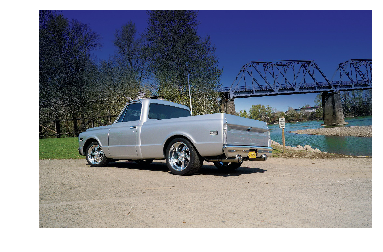

Predicted object : truck


In [0]:
user_input("https://st.hotrod.com/uploads/sites/21/2015/03/1970-gmc-truck-rear-driver-side.jpg")

In [0]:
# #filter for any random image
# imshow(rand_img[0])
# filter_no = 2
# filter = net.cnn_model[0](rand_img)
# for i in range(1,filter_no):
#   filter = net.cnn_model[i](filter)
  
# plt.figure(figsize = (6,6))
# plt.subplot(321)
# for i in range(6):
#     ax1 = plt.subplot(3, 2, i+1)
#     plt.imshow(filter[0, i, :, :].detach().numpy())
# plt.show()
